## LOAD DATA

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/income.csv')

In [19]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


## EDA

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [22]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [23]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,47879,48842,48842,47876,48842,48842,48842,48568,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [24]:
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [25]:
# Check for duplicates in each column
print("\nDuplicate Values per Column:")
for col in df.columns:
    duplicate_count = df[col].duplicated().sum()
    if duplicate_count > 0:
        print(f"Column '{col}': {duplicate_count} duplicates")
    else:
        print(f"Column '{col}': No duplicates")

# Check for duplicate rows
print("\nTotal Duplicate Rows:")
print(df.duplicated().sum())


Duplicate Values per Column:
Column 'age': 48768 duplicates
Column 'workclass': 48832 duplicates
Column 'fnlwgt': 20319 duplicates
Column 'education': 48826 duplicates
Column 'education-num': 48826 duplicates
Column 'marital-status': 48835 duplicates
Column 'occupation': 48826 duplicates
Column 'relationship': 48836 duplicates
Column 'race': 48837 duplicates
Column 'sex': 48840 duplicates
Column 'capital-gain': 48719 duplicates
Column 'capital-loss': 48743 duplicates
Column 'hours-per-week': 48746 duplicates
Column 'native-country': 48799 duplicates
Column 'income': 48838 duplicates

Total Duplicate Rows:
29


In [26]:
# prompt: buatkan kodingan untuk melihat semua unique value di setiap columnnya

print("\nUnique Values per Column:")
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column '{col}':")
    print(unique_values)
    print("-" * 20)


Unique Values per Column:
Column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
--------------------
Column 'workclass':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
--------------------
Column 'fnlwgt':
[ 77516  83311 215646 ... 173449  89686 350977]
--------------------
Column 'education':
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
--------------------
Column 'education-num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
--------------------
Column 'marital-status':
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
-------------

## FEATURE ENGINEERING

In [27]:
# prompt: buatkan kodingan untuk menghapus semua duplicate rows

# Menghapus semua baris duplikat
df_cleaned = df.drop_duplicates()

# Verifikasi bahwa baris duplikat telah dihapus
print("\nTotal Rows after Dropping Duplicates:")
print(len(df_cleaned))
print("\nTotal Duplicate Rows after Dropping Duplicates:")
print(df_cleaned.duplicated().sum())


Total Rows after Dropping Duplicates:
48813

Total Duplicate Rows after Dropping Duplicates:
0


In [28]:
# prompt: pada kolom income terdapat 4 unik value yang dikarenakan perbedaan titik. tolong buatkan kodingan untuk menghapus titik pada kolom income

df_cleaned['income'] = df_cleaned['income'].str.replace('.', '', regex=False)

<ipython-input-28-df6f1986a4c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['income'] = df_cleaned['income'].str.replace('.', '', regex=False)


In [29]:
# prompt: buatkan kodingan untuk mengubah semua tipedata kategorikal menjadi numerik untuk setiap column

from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom kategorikal
categorical_cols = df_cleaned.select_dtypes(include='object').columns

# Terapkan Label Encoding pada setiap kolom kategorikal
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])

# Tampilkan info dataframe setelah encoding
df_cleaned.info()
print(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48813 non-null  int64
 1   workclass       48813 non-null  int64
 2   fnlwgt          48813 non-null  int64
 3   education       48813 non-null  int64
 4   education-num   48813 non-null  int64
 5   marital-status  48813 non-null  int64
 6   occupation      48813 non-null  int64
 7   relationship    48813 non-null  int64
 8   race            48813 non-null  int64
 9   sex             48813 non-null  int64
 10  capital-gain    48813 non-null  int64
 11  capital-loss    48813 non-null  int64
 12  hours-per-week  48813 non-null  int64
 13  native-country  48813 non-null  int64
 14  income          48813 non-null  int64
dtypes: int64(15)
memory usage: 6.0 MB
   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          7   77516          9             13    

<ipython-input-29-8a9a7e85b258>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])
<ipython-input-29-8a9a7e85b258>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])
<ipython-input-29-8a9a7e85b258>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [32]:
print("\nUnique Values per Column:")
for col in df_cleaned.columns:
    unique_values = df_cleaned[col].unique()
    print(f"Column '{col}':")
    print(unique_values)
    print("-" * 20)
df = df_cleaned


Unique Values per Column:
Column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
--------------------
Column 'workclass':
[7 6 4 1 2 0 5 8 3 9]
--------------------
Column 'fnlwgt':
[ 77516  83311 215646 ... 173449  89686 350977]
--------------------
Column 'education':
[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
--------------------
Column 'education-num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
--------------------
Column 'marital-status':
[4 2 0 3 5 1 6]
--------------------
Column 'occupation':
[ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9 15]
--------------------
Column 'relationship':
[1 0 5 3 4 2]
--------------------
Column 'race':
[4 2 1 0 3]
--------------------
Column 'sex':
[1 0]
--------------------
Column 'capital-gain':
[ 2174     0 14084  5178  5013  2407 14344 15024  76

## MODELING

### BOOSTING (XGBOOST)

Accuracy: 0.8743

Metrics per class:
  Class <=50K:
    Precision: 0.8982
    Recall: 0.9414
    F1 Squared: 0.8452
  Class >50K:
    Precision: 0.7803
    Recall: 0.6611
    F1 Squared: 0.5123

AUC: 0.9283


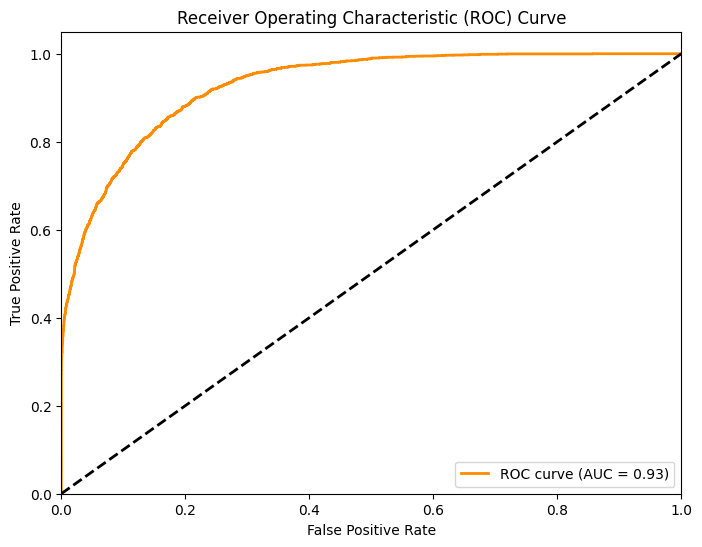

In [34]:
# prompt: buatkan model machine learning menggunakan XGBOOST untuk klasifikasi  dengan ketentuan sebagai berikut. Memiliki 5 matrix evaluasi yakni (akurasi, presisi, recall, F1 squered untuk setiap kelasnya), AUC, dan beserta grafik ROC

!pip install xgboost scikit-learn matplotlib seaborn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the target column is named 'income'
if 'income' not in df.columns:
    print("Error: 'income' column not found in the DataFrame. Please update the target column name.")
else:
    X = df.drop('income', axis=1)
    y = df['income']

    # Encode the target variable if it's not already numerical (it should be after the preceding code)
    if y.dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(y)

    # Split the data into training and testing sets
    # Use stratify=y for classification to maintain class proportions in train/test splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Initialize and train the XGBoost classifier
    # Ensure objective is 'binary:logistic' for binary classification
    # If your 'income' column has more than 2 unique values, change objective to 'multi:softmax'
    # and num_class to len(df['income'].unique())
    model = XGBClassifier(objective='binary:logistic', random_state=42) # Assuming binary classification based on potential values
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision, Recall, and F1-score for each class
    # Use average=None to get scores per class
    precision = precision_score(y_test, y_pred, average=None, zero_division=1)
    recall = recall_score(y_test, y_pred, average=None, zero_division=1)
    # Calculate F1 squared for each class
    f1_squared = f1_score(y_test, y_pred, average=None, zero_division=1) ** 2

    # Get the original class names from the LabelEncoder fitted on the target
    if 'income' in label_encoders:
         classes = label_encoders['income'].classes_
    else:
         # Fallback if label_encoders was not created for 'income' (unlikely with preceding code)
         classes = sorted(df['income'].unique())


    print("\nMetrics per class:")
    for i, class_name in enumerate(classes):
        print(f"  Class {class_name}:")
        print(f"    Precision: {precision[i]:.4f}")
        print(f"    Recall: {recall[i]:.4f}")
        print(f"    F1 Squared: {f1_squared[i]:.4f}")

    # AUC (Area Under the ROC Curve) and ROC Curve
    # For binary classification, roc_auc_score works directly
    try:
        y_prob = model.predict_proba(X_test)[:, 1] # Get probability of the positive class
        auc = roc_auc_score(y_test, y_prob)
        print(f"\nAUC: {auc:.4f}")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

    except ValueError as e:
        print(f"\nCould not calculate AUC and plot ROC curve: {e}")
        print("This might happen if there's only one class present in the test set after splitting.")


### BAGING


Bagging Model Evaluation:
Accuracy: 0.8582

Metrics per class (Bagging):
  Class <=50K:
    Precision: 0.8861
    Recall: 0.9336
    F1 Squared: 0.8267
  Class >50K:
    Precision: 0.7457
    Recall: 0.6187
    F1 Squared: 0.4574

AUC (Bagging): 0.9011


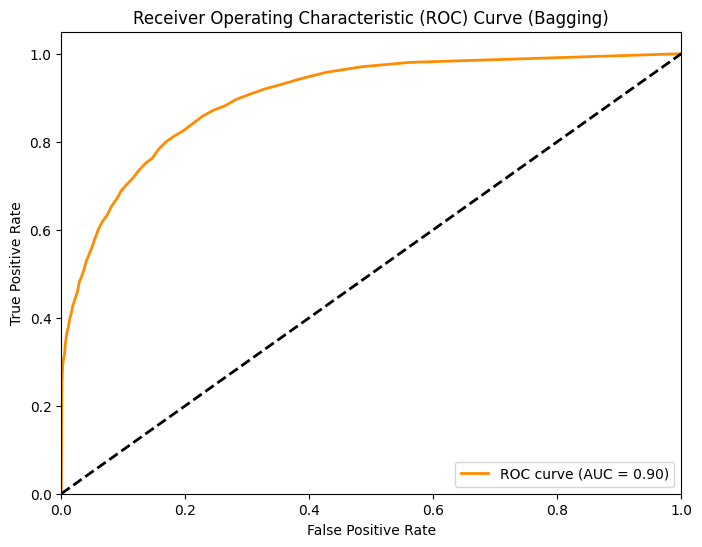

In [36]:
# prompt: buatkan model machine learning menggunakan Baging untuk klasifikasi  dengan ketentuan sebagai berikut. Memiliki 5 matrix evaluasi yakni (akurasi, presisi, recall, F1 squered untuk setiap kelasnya), AUC, dan beserta grafik ROC

from sklearn.ensemble import BaggingClassifier

# Initialize and train the Bagging classifier
# Use the best parameters found from previous steps or default
# base_estimator can be the XGBoost model or another classifier like DecisionTreeClassifier
# For simplicity, we'll use a default DecisionTreeClassifier or keep it None which defaults to DT
# If using XGBoost as base_estimator, make sure it's imported and potentially re-initialized
# base_estimator = XGBClassifier(objective='binary:logistic', random_state=42) # Example if using XGBoost

bagging_model = BaggingClassifier(n_estimators=50, random_state=42) # n_estimators is number of base estimators (trees)
bagging_model.fit(X_train, y_train)

# Make predictions on the test set using Bagging model
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the Bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"\nBagging Model Evaluation:")
print(f"Accuracy: {accuracy_bagging:.4f}")

# Precision, Recall, and F1-score for each class (Bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average=None, zero_division=1)
recall_bagging = recall_score(y_test, y_pred_bagging, average=None, zero_division=1)
# Calculate F1 squared for each class (Bagging)
f1_squared_bagging = f1_score(y_test, y_pred_bagging, average=None, zero_division=1) ** 2

print("\nMetrics per class (Bagging):")
for i, class_name in enumerate(classes):
    print(f"  Class {class_name}:")
    print(f"    Precision: {precision_bagging[i]:.4f}")
    print(f"    Recall: {recall_bagging[i]:.4f}")
    print(f"    F1 Squared: {f1_squared_bagging[i]:.4f}")

# AUC (Area Under the ROC Curve) and ROC Curve (Bagging)
try:
    # Get probability of the positive class
    y_prob_bagging = bagging_model.predict_proba(X_test)[:, 1]
    auc_bagging = roc_auc_score(y_test, y_prob_bagging)
    print(f"\nAUC (Bagging): {auc_bagging:.4f}")

    # ROC Curve (Bagging)
    fpr_bagging, tpr_bagging, _ = roc_curve(y_test, y_prob_bagging)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_bagging, tpr_bagging, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_bagging:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Bagging)')
    plt.legend(loc="lower right")
    plt.show()

except ValueError as e:
    print(f"\nCould not calculate AUC and plot ROC curve for Bagging: {e}")
    print("This might happen if there's only one class present in the test set after splitting.")


## PERHITUNGAN MATEMATIS YANG TERLIBAT

1. Acuracy:
  - Accuracy mengukur proporsi prediksi yang benar (baik positif maupun negatif) dibandingkan dengan total jumlah prediksi.
  - berikut merupakan rumus akurasi:
    - 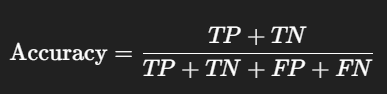
  - Kelemahan: Accuracy bisa menyesatkan jika data tidak seimbang (misalnya, jika kelas minoritas sangat kecil, accuracy bisa sangat tinggi meskipun model tidak melakukan pekerjaan dengan baik pada kelas minoritas).
2. Precision (presisi)
  - Precision mengukur akurasi dari prediksi positif yang dilakukan oleh model. Ini menunjukkan seberapa banyak prediksi positif yang benar-benar positif.
  - Berikut merupakan rumus dari presisi:
    - 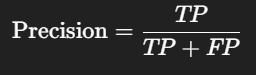
  - Interpretasi: Precision yang tinggi menunjukkan bahwa model tidak banyak menghasilkan False Positive (misalnya, memprediksi positif untuk data yang sebenarnya negatif).
3. Recall
  - Recall mengukur seberapa banyak instance positif yang benar-benar dapat ditemukan oleh model. Ini adalah proporsi instance positif yang berhasil diprediksi sebagai positif.
  -  Berikut merupakan rumus dari recall:
    - 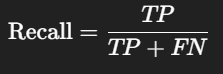
  - Interpretasi: Recall yang tinggi menunjukkan bahwa model berhasil menemukan banyak contoh positif, tetapi mungkin dengan mengorbankan False Positives.
4. F1 score:
  - F1 Score adalah rata-rata harmonik dari Precision dan Recall. F1 Score memberikan gambaran yang lebih baik tentang kinerja model ketika ada ketidakseimbangan antara Precision dan Recall.
  - Berikut merupakan rumus dari F1:
    - 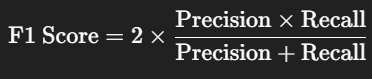
  - Interpretasi: F1 score memberikan keseimbangan antara precision dan recall, dan berguna ketika kita menginginkan keseimbangan antara keduanya, terutama dalam kasus di mana ada ketidakseimbangan kelas.
5. AUC - ROC
  - AUC mengukur area di bawah ROC Curve, yang menggambarkan trade-off antara True Positive Rate (Recall) dan False Positive Rate (FPR) pada berbagai threshold prediksi.
  - Berikut merupakan rumus dari AUC - ROC:
    - 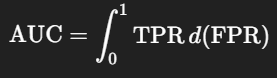
  - Interpretasi: AUC adalah ukuran dari seberapa baik model dapat memisahkan dua kelas. AUC berkisar antara 0 dan 1, dengan nilai mendekati 1 menunjukkan bahwa model dapat memisahkan kelas dengan sangat baik.

## KESIMPULAN

1. Akurasi Model:
  - Bagging Model memiliki akurasi lebih tinggi (0.8582) dibandingkan Boosting Model (0.8743), meskipun Boosting Model sedikit lebih unggul dalam hal AUC dan kemampuan membedakan antara kelas-kelas tersebut.
2. Performa pada Kelas <=50K:
  - Boosting Model menunjukkan sedikit keunggulan pada kelas <=50K dengan precision dan recall yang lebih baik serta F1 Squared yang lebih tinggi.
  - Bagging Model tetap sangat baik dalam mengklasifikasikan <=50K, tetapi performa Boosting Model lebih baik sedikit.
3. Performa pada Kelas >50K:
  - Bagging Model memiliki precision dan recall lebih baik pada Class >50K dibandingkan dengan Boosting Model, namun Boosting Model sedikit lebih baik dalam F1 Squared meskipun precision dan recall-nya sedikit lebih rendah.
4. AUC:
  - Boosting Model sedikit lebih baik dalam hal AUC (0.9283) dibandingkan Bagging Model (0.9011), yang menunjukkan bahwa Boosting Model lebih baik dalam memisahkan kedua kelas.

## REKOMENDASI

- Kedua model menunjukkan performa yang sangat baik, namun Boosting Model sedikit lebih baik dalam hal AUC dan kemampuan memprediksi kelas <=50K dengan lebih akurat.
- Bagging Model menunjukkan performa yang lebih konsisten pada Class >50K, dengan precision dan recall yang lebih baik dibandingkan Boosting Model pada kelas ini.
- Untuk perbaikan: Anda bisa mempertimbangkan untuk **menyempurnakan model pada kelas >50K (terutama pada Bagging Model dan Boosting Model) untuk meningkatkan prediksi kelas minoritas.